In [1]:
from fastai.vision.all import *

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('subset.csv')

In [4]:
def get_caption_embedding(caption_embedding):
    value=caption_embedding.split(',')
    value.pop(0)
    embedding_val = [float(i) for i in value]
    return embedding_val

In [5]:
def get_x(r): return r['img']
def get_y(r): return get_caption_embedding(r['caption_embedding'])

In [6]:
dblocks = DataBlock((ImageBlock,RegressionBlock),
                       get_x= get_x,
                       get_y = get_y,
                       batch_tfms=[*aug_transforms(size=(240,320)),Normalize.from_stats(*imagenet_stats)])
dls=dblocks.dataloaders(df)

In [7]:
learn = cnn_learner(dls, resnet18, y_range=(0,1),metrics=accuracy_multi)

SuggestedLRs(lr_min=0.03630780577659607, lr_steep=0.03981071710586548)

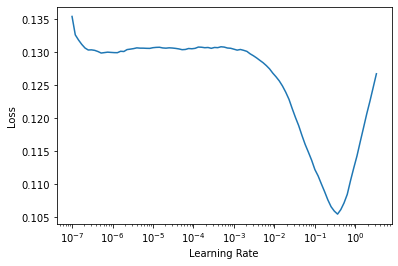

In [8]:
learn.lr_find()

In [9]:
lr = 3e-3
learn.fine_tune(3, lr)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.094122,0.035328,0.989192,00:14


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.036842,0.024715,0.989148,00:18
1,0.029151,0.024097,0.988948,00:17
2,0.026789,0.023498,0.988988,00:17


In [10]:
val_csv=pd.read_csv('val.csv')

In [11]:
test_dl = dls.test_dl(val_csv,with_labels=True)

In [12]:
preds = learn.get_preds(dl=test_dl)
learn.validate(dl=test_dl)

(#2) [0.02326110377907753,0.9885242581367493]

In [40]:
img_embedding=np.array(preds[0].cpu())

In [43]:
for batch_idx, img_embedding in enumerate(preds[0]):
    print(batch_idx)   

0
